<a href="https://colab.research.google.com/github/vamsyvijay/OIBSIP/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#We have the Dataset of cars now we are going to build a model which it predicts the selling price of a car based on different paremetres it holds

#Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Load the Data

*   Here we are using car data




In [ ]:
df = pd.read_csv("/content/car data.csv")

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#EDA (Exploratory Data Analysis)

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
df.Selling_type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
df.Car_Name.nunique()

98

In [ ]:
df.Owner.unique()

array([0, 1, 3])

# Preprocessing and Feature Engineering




*   we have the year the car has been made and now we can make a new feature based on that year
*   The age of car can be made by subracting the car sold year to current year




In [ ]:
df['current_year']=2023

In [ ]:
df['Age_of_car']= df['current_year'] - df['Year']

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,current_year,Age_of_car
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [ ]:
# We have nothing to do with the car name column in the dataset and current year as well
df.drop('Car_Name',axis=1,inplace=True)
df.drop('current_year',axis=1,inplace=True)


In [ ]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age_of_car
0,2014,3.35,5.59,27000,2,Dealer,Manual,0,9
1,2013,4.75,9.54,43000,1,Dealer,Manual,0,10
2,2017,7.25,9.85,6900,2,Dealer,Manual,0,6
3,2011,2.85,4.15,5200,2,Dealer,Manual,0,12
4,2014,4.60,6.87,42450,1,Dealer,Manual,0,9


*We have different Catagorical columns in the dataset ,*Using encoding we'll make them as numerical columns


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['Fuel_Type']= encoder.fit_transform(df['Fuel_Type'])
df['Selling_type']= encoder.fit_transform(df['Selling_type'])
df['Transmission']= encoder.fit_transform(df['Transmission'])


In [ ]:
df.to_csv("/content/cleaned_car_data.csv",index=False)

# Data Visualization


In [ ]:
!pip install autoviz

In [ ]:
%matplotlib inline

Shape of your Data Set loaded: (301, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################


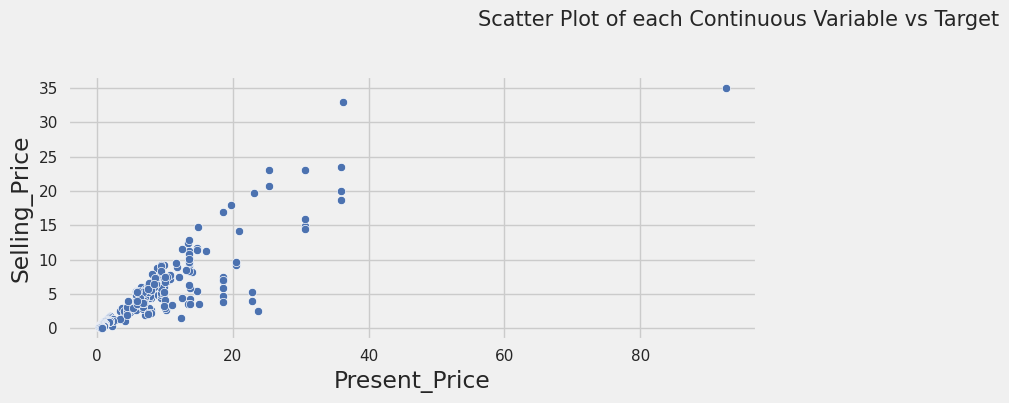

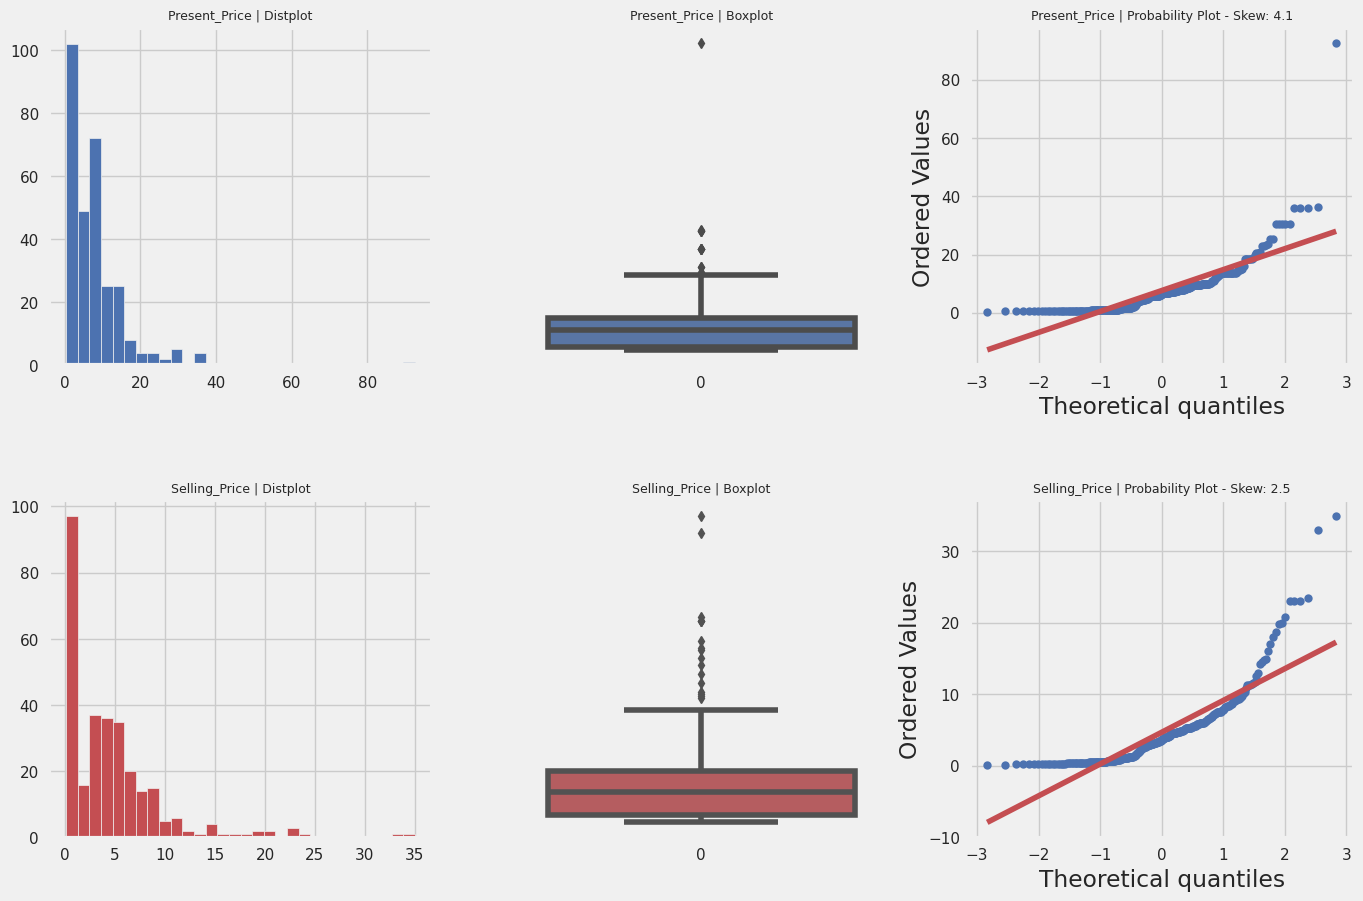

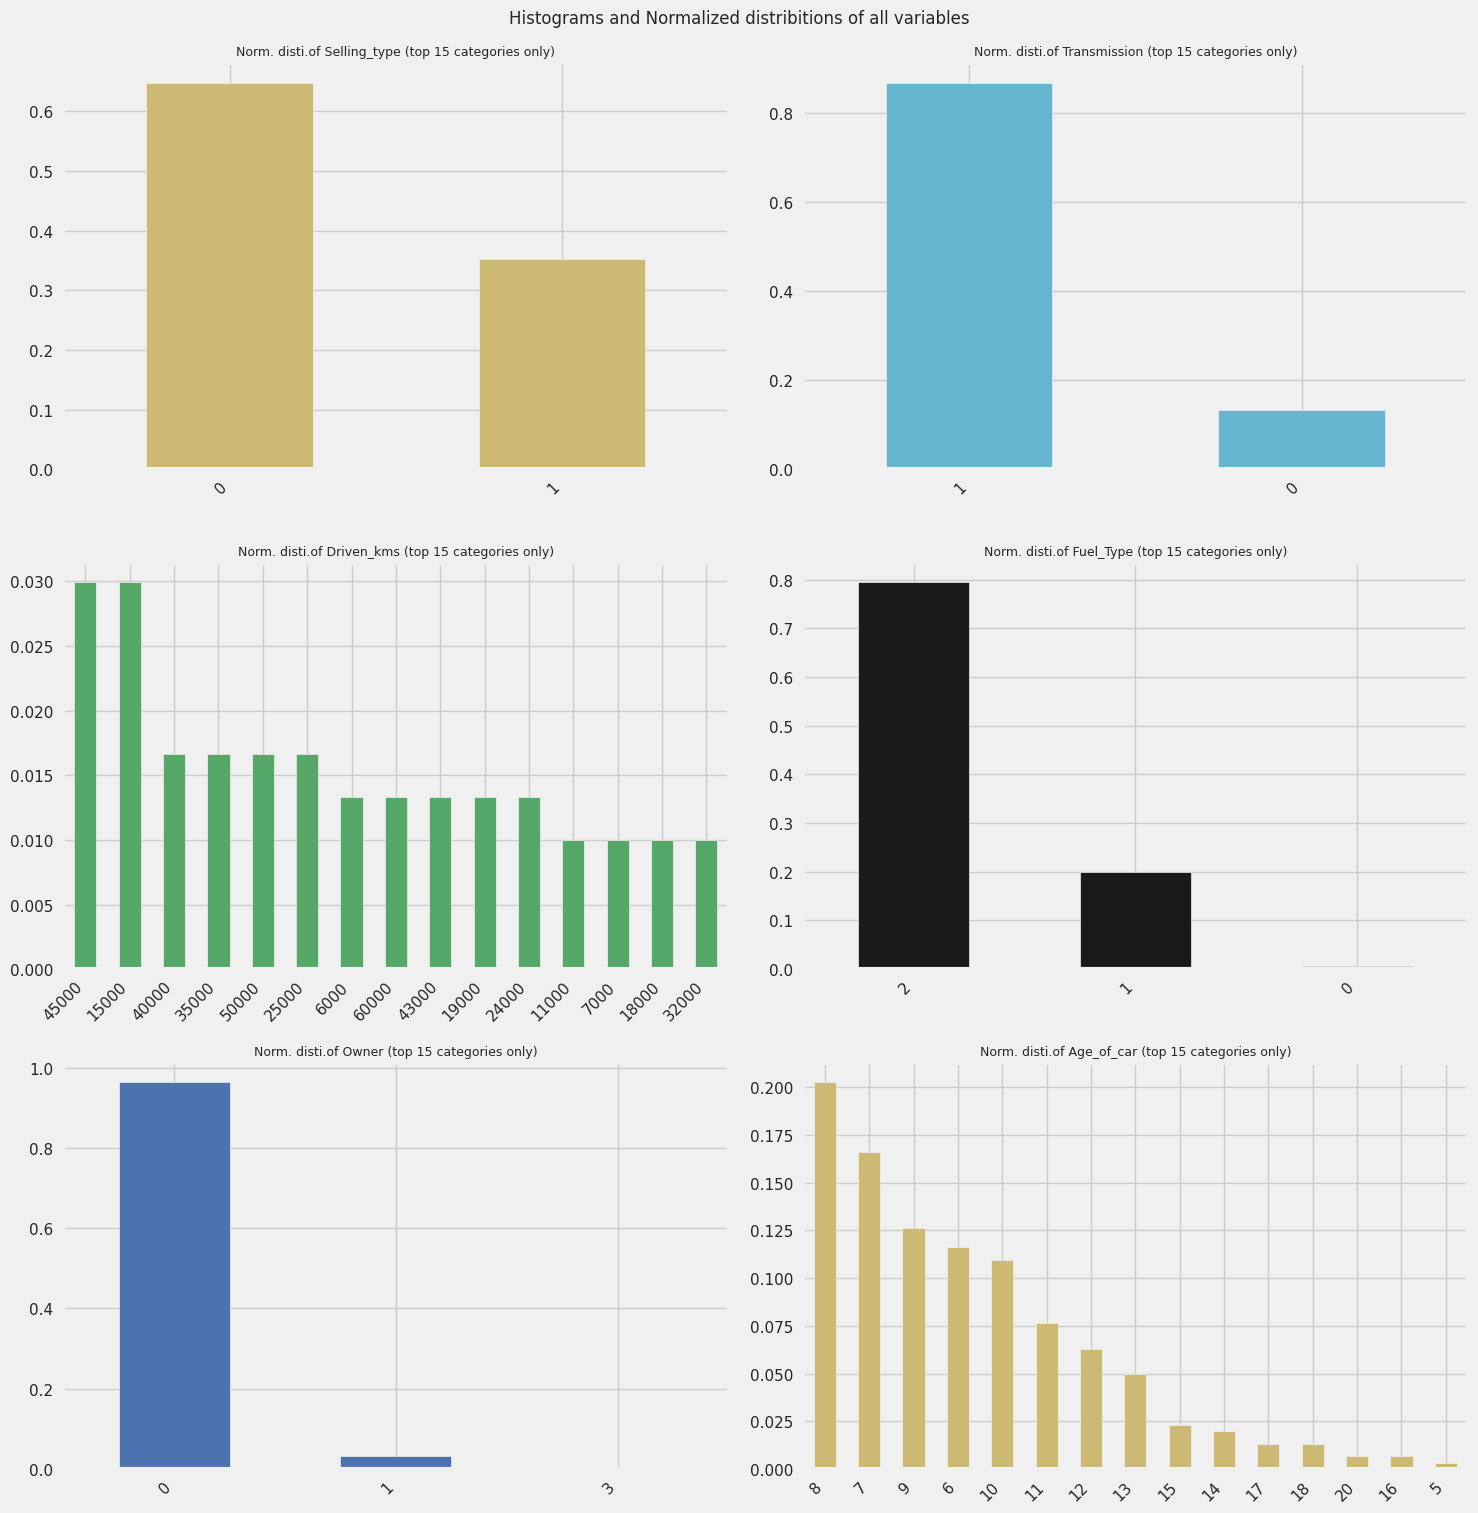

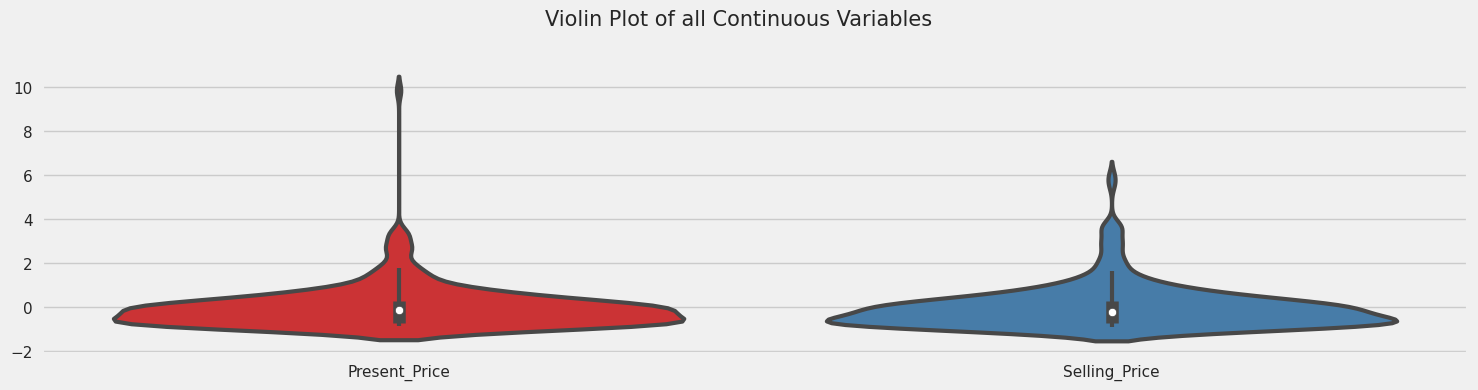

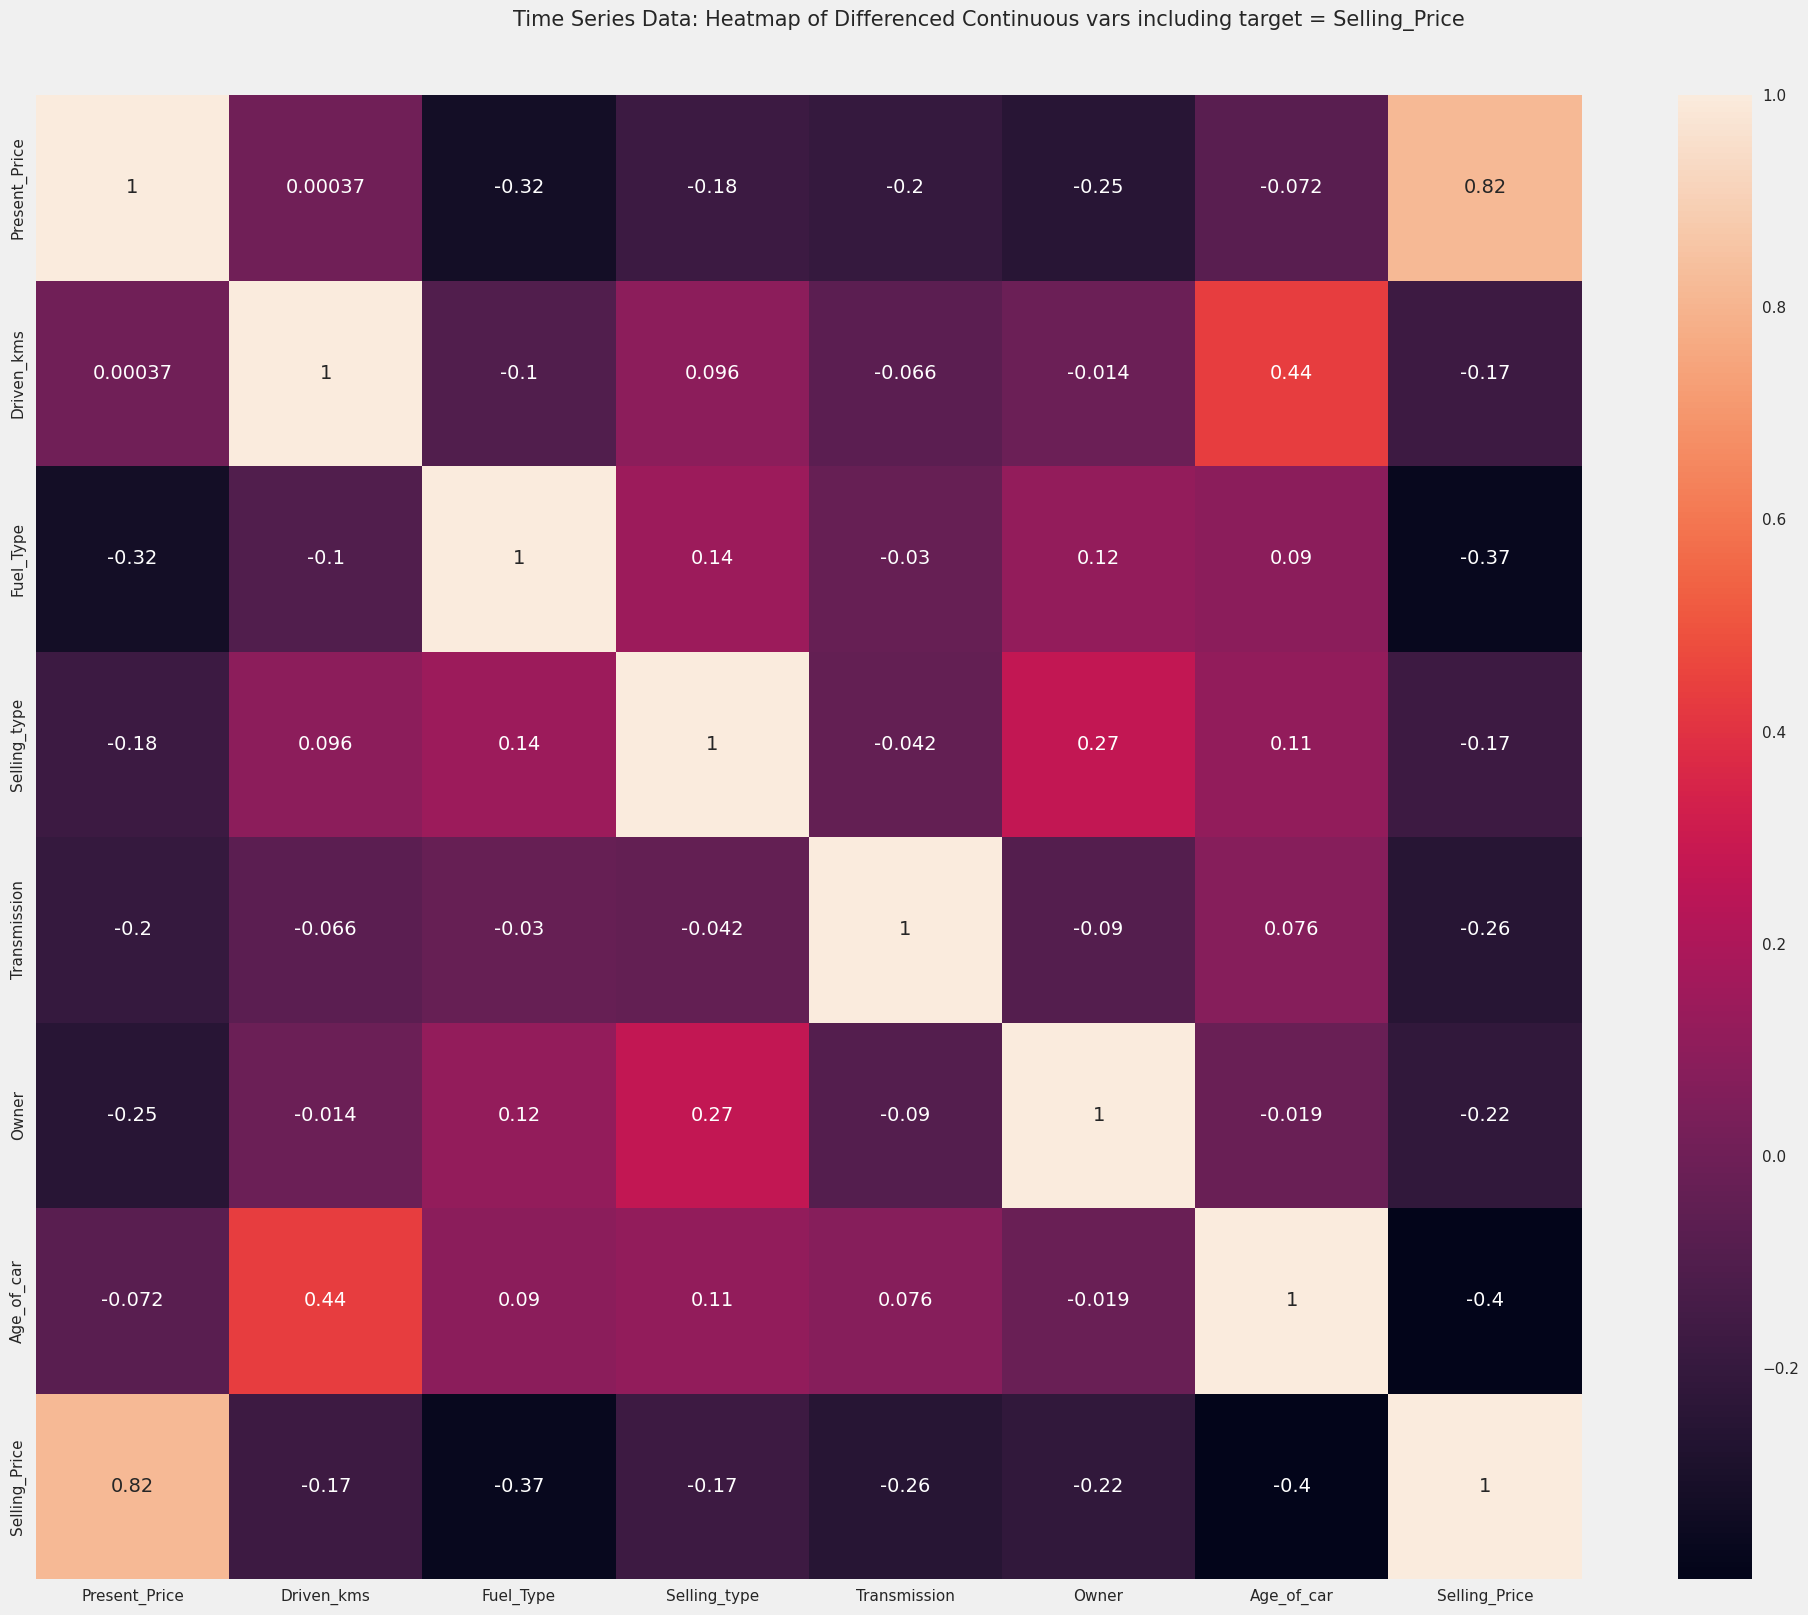

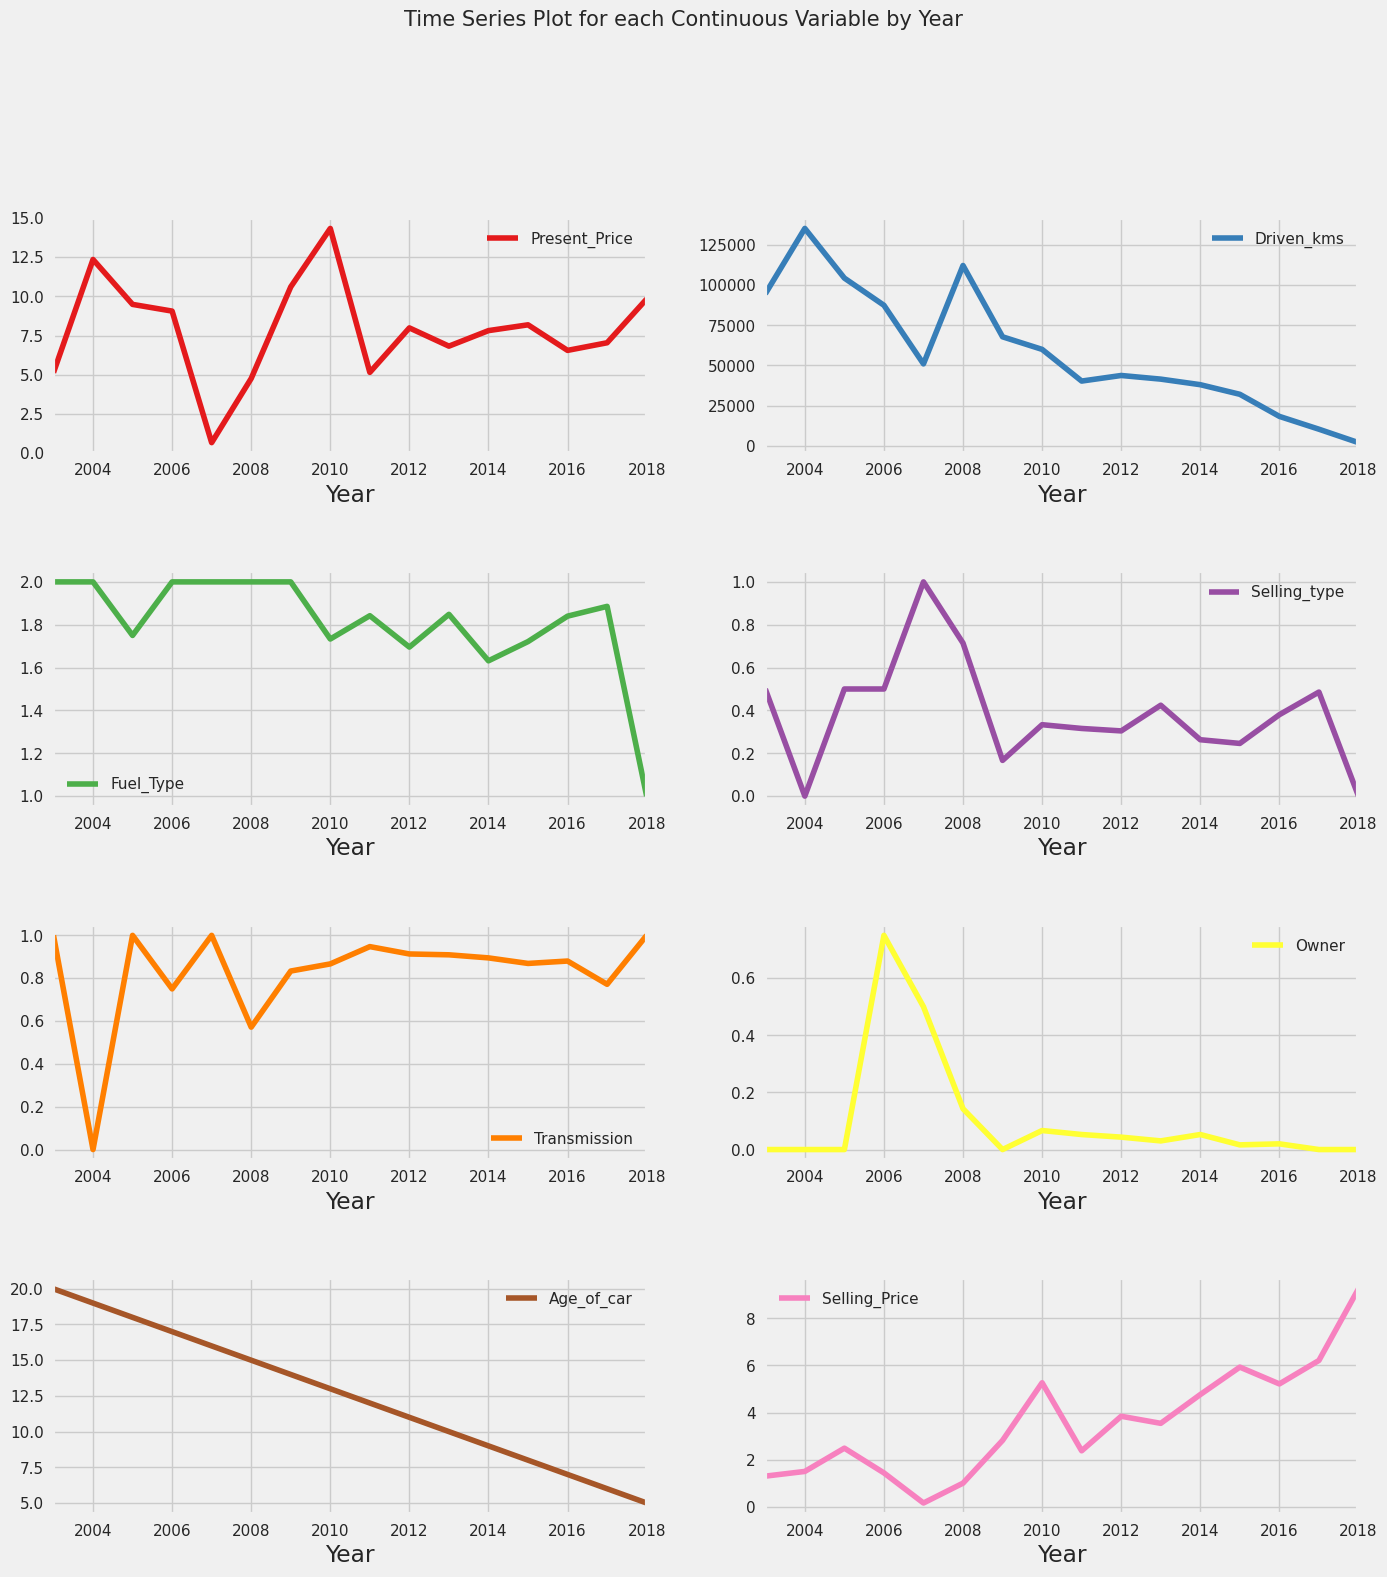

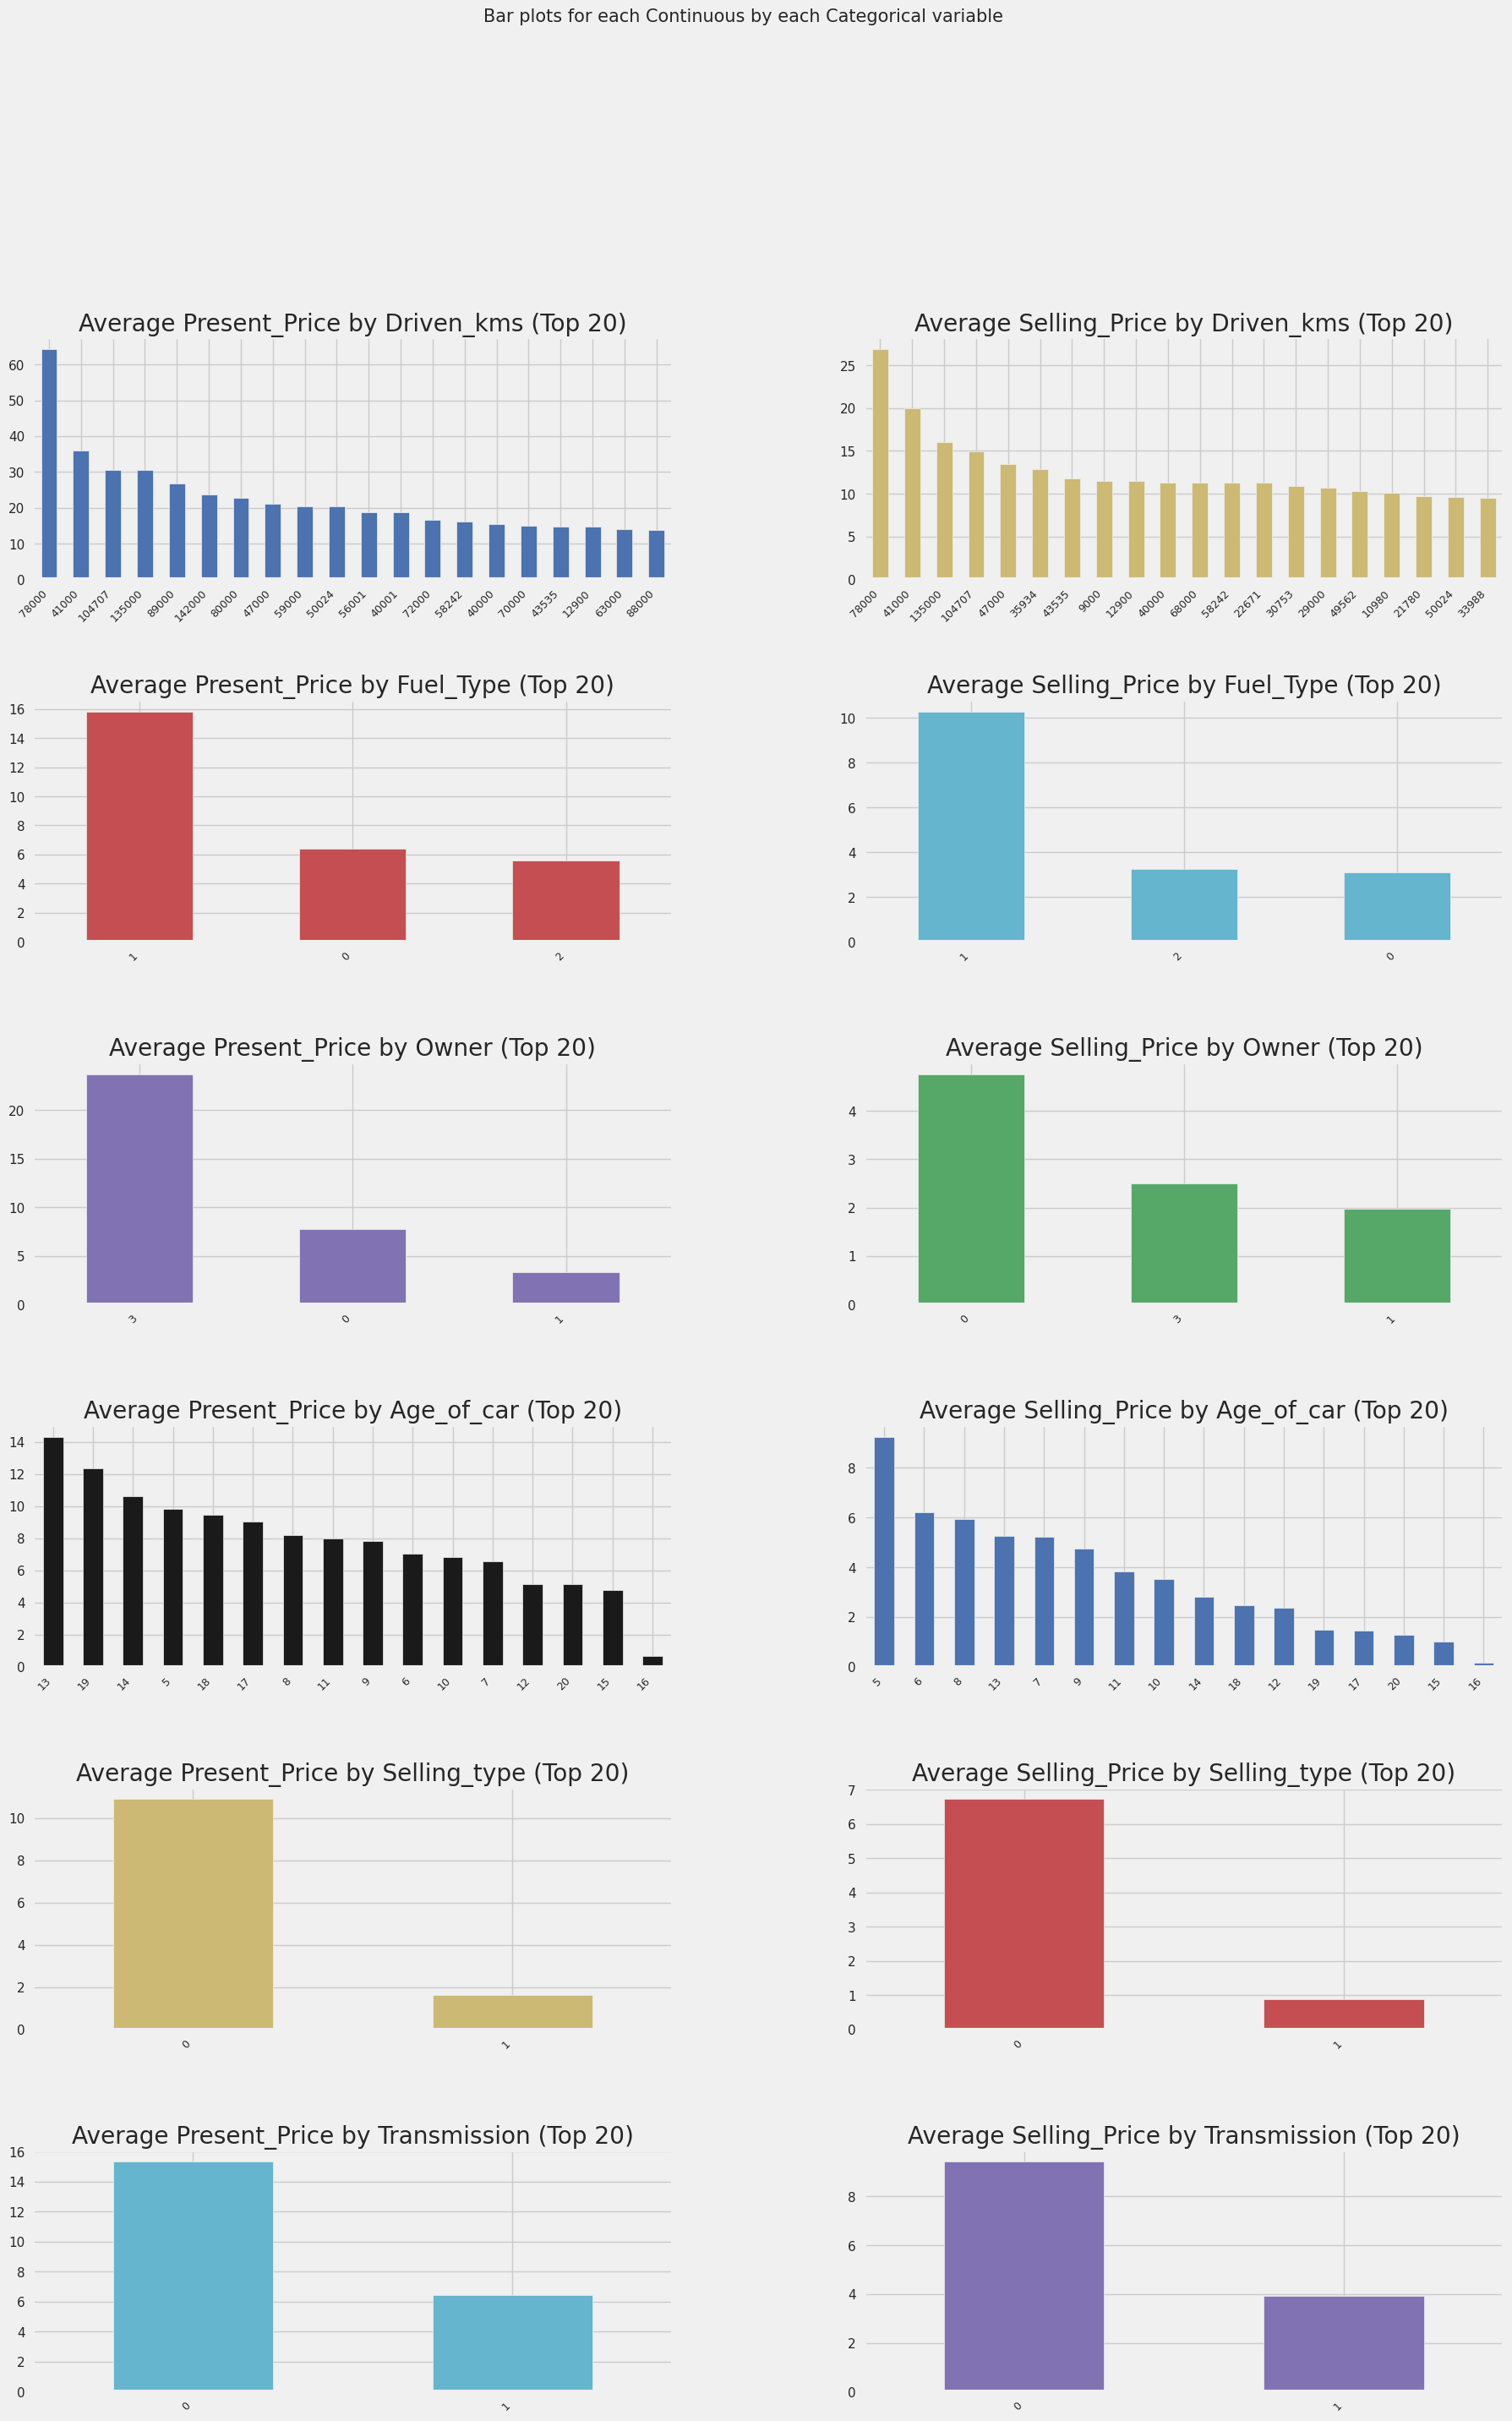

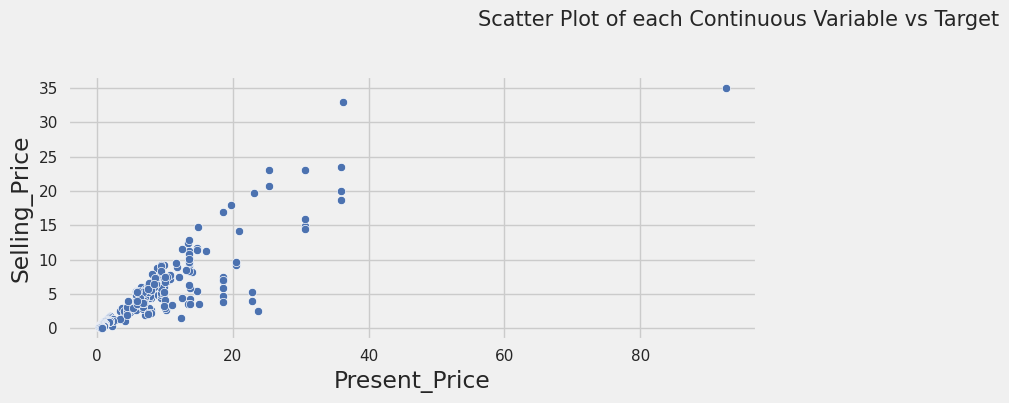

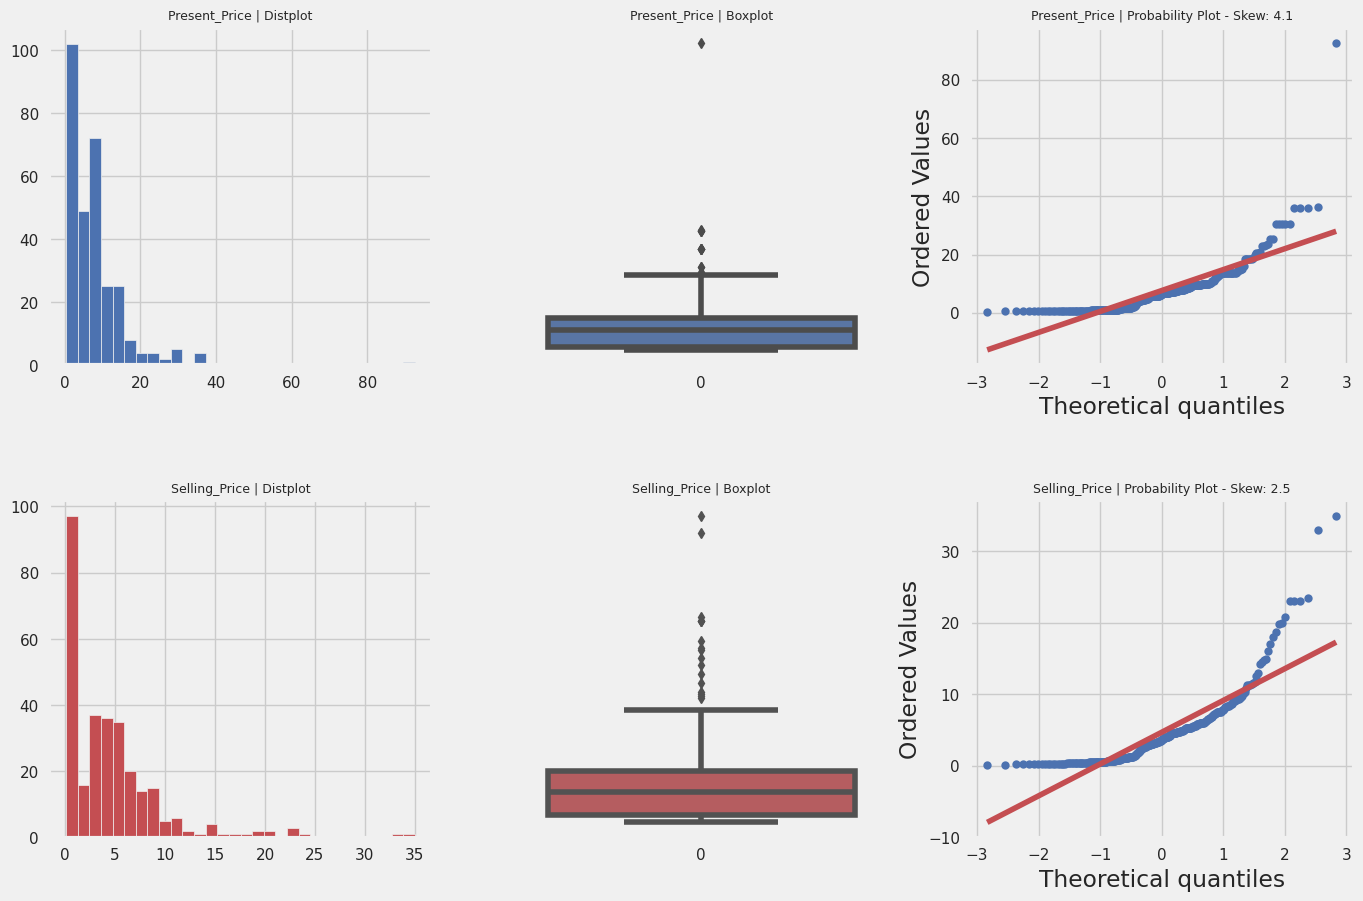

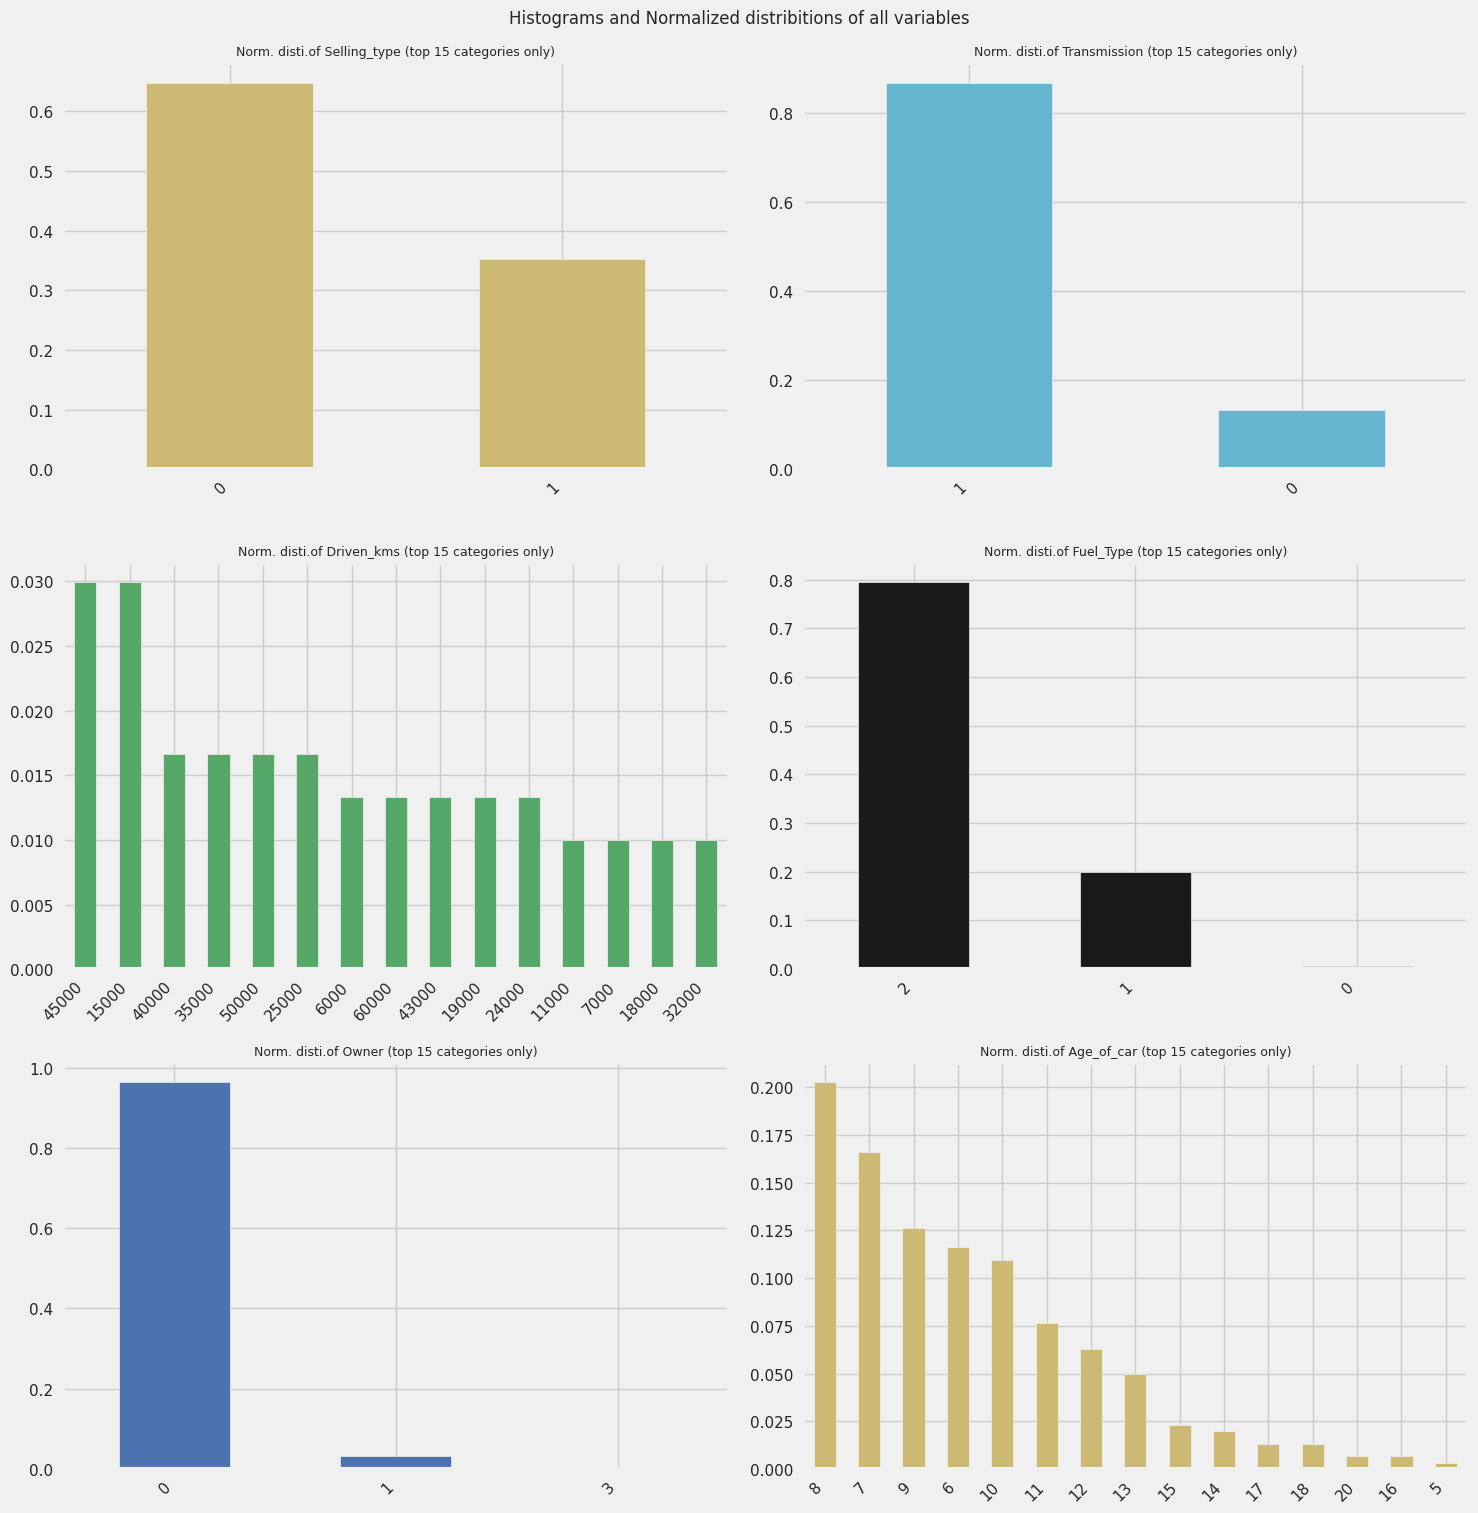

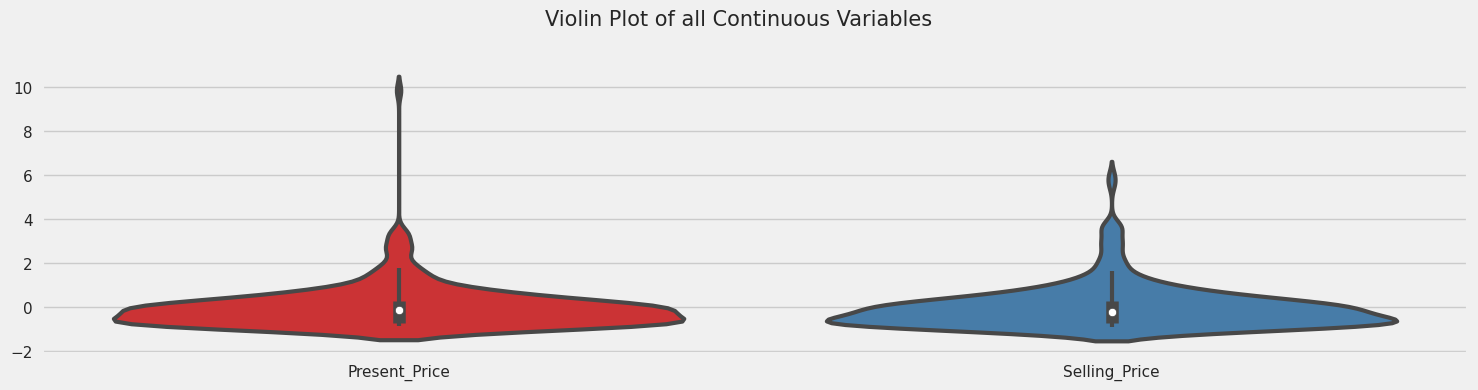

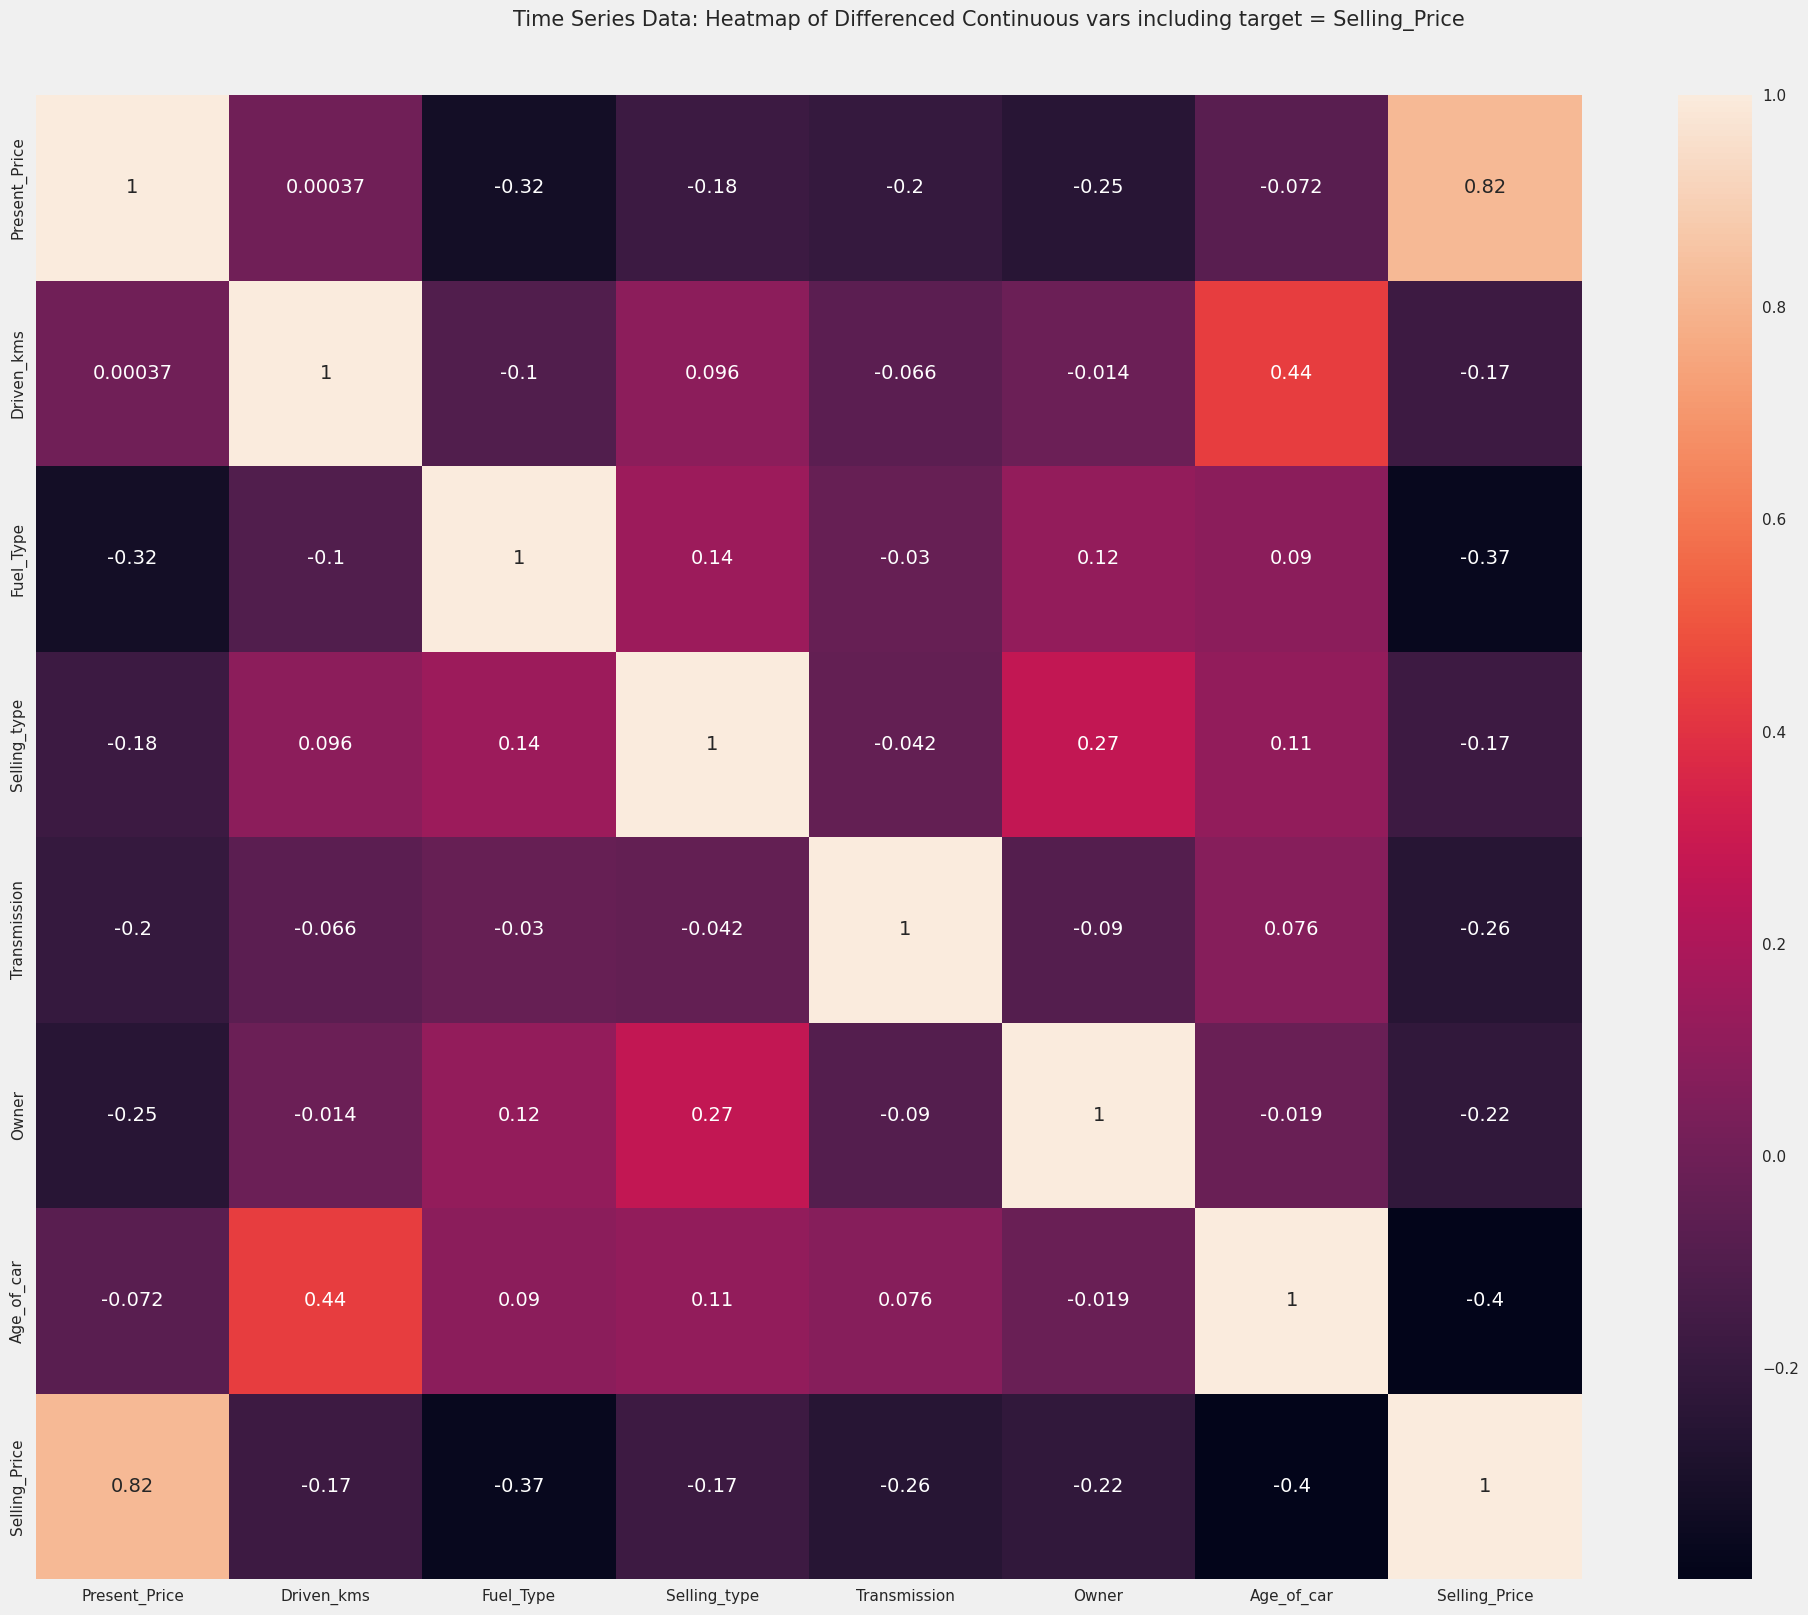

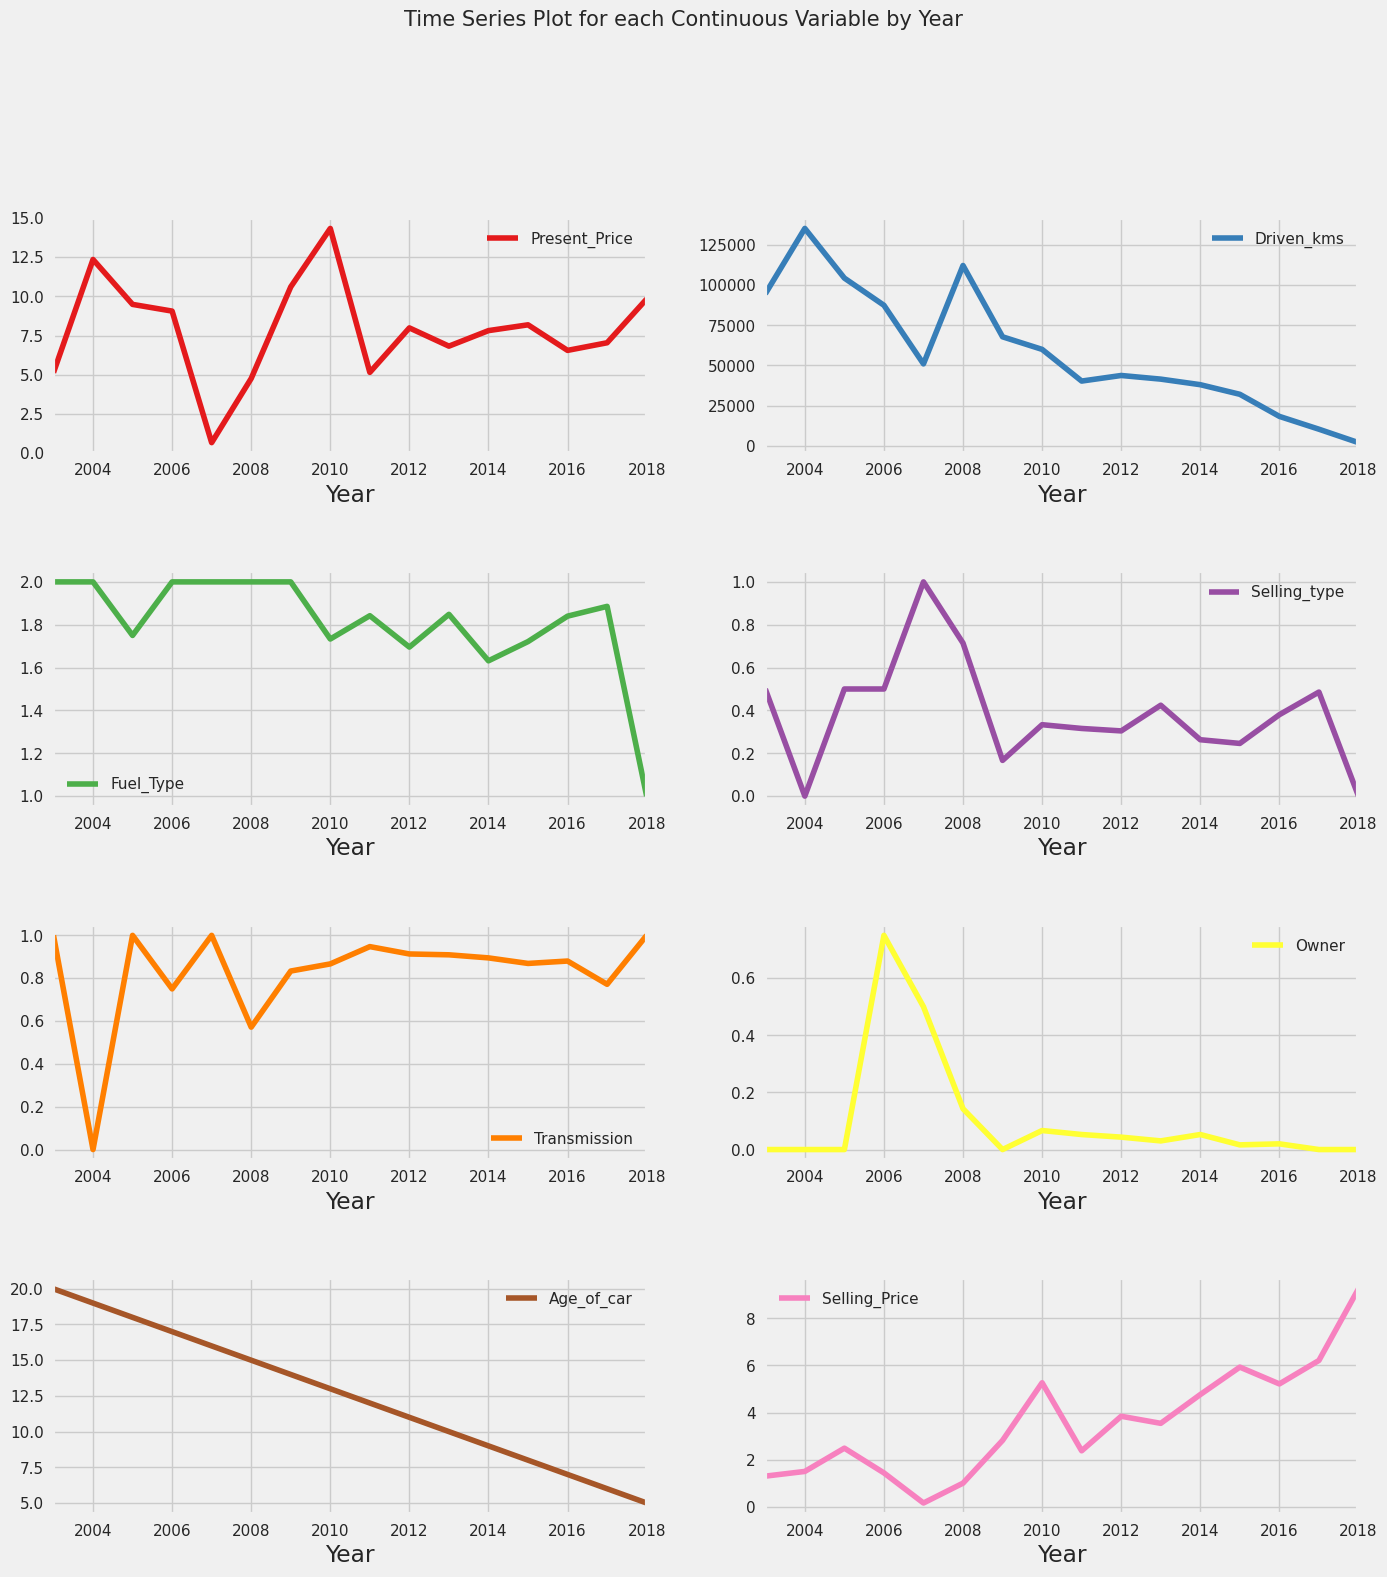

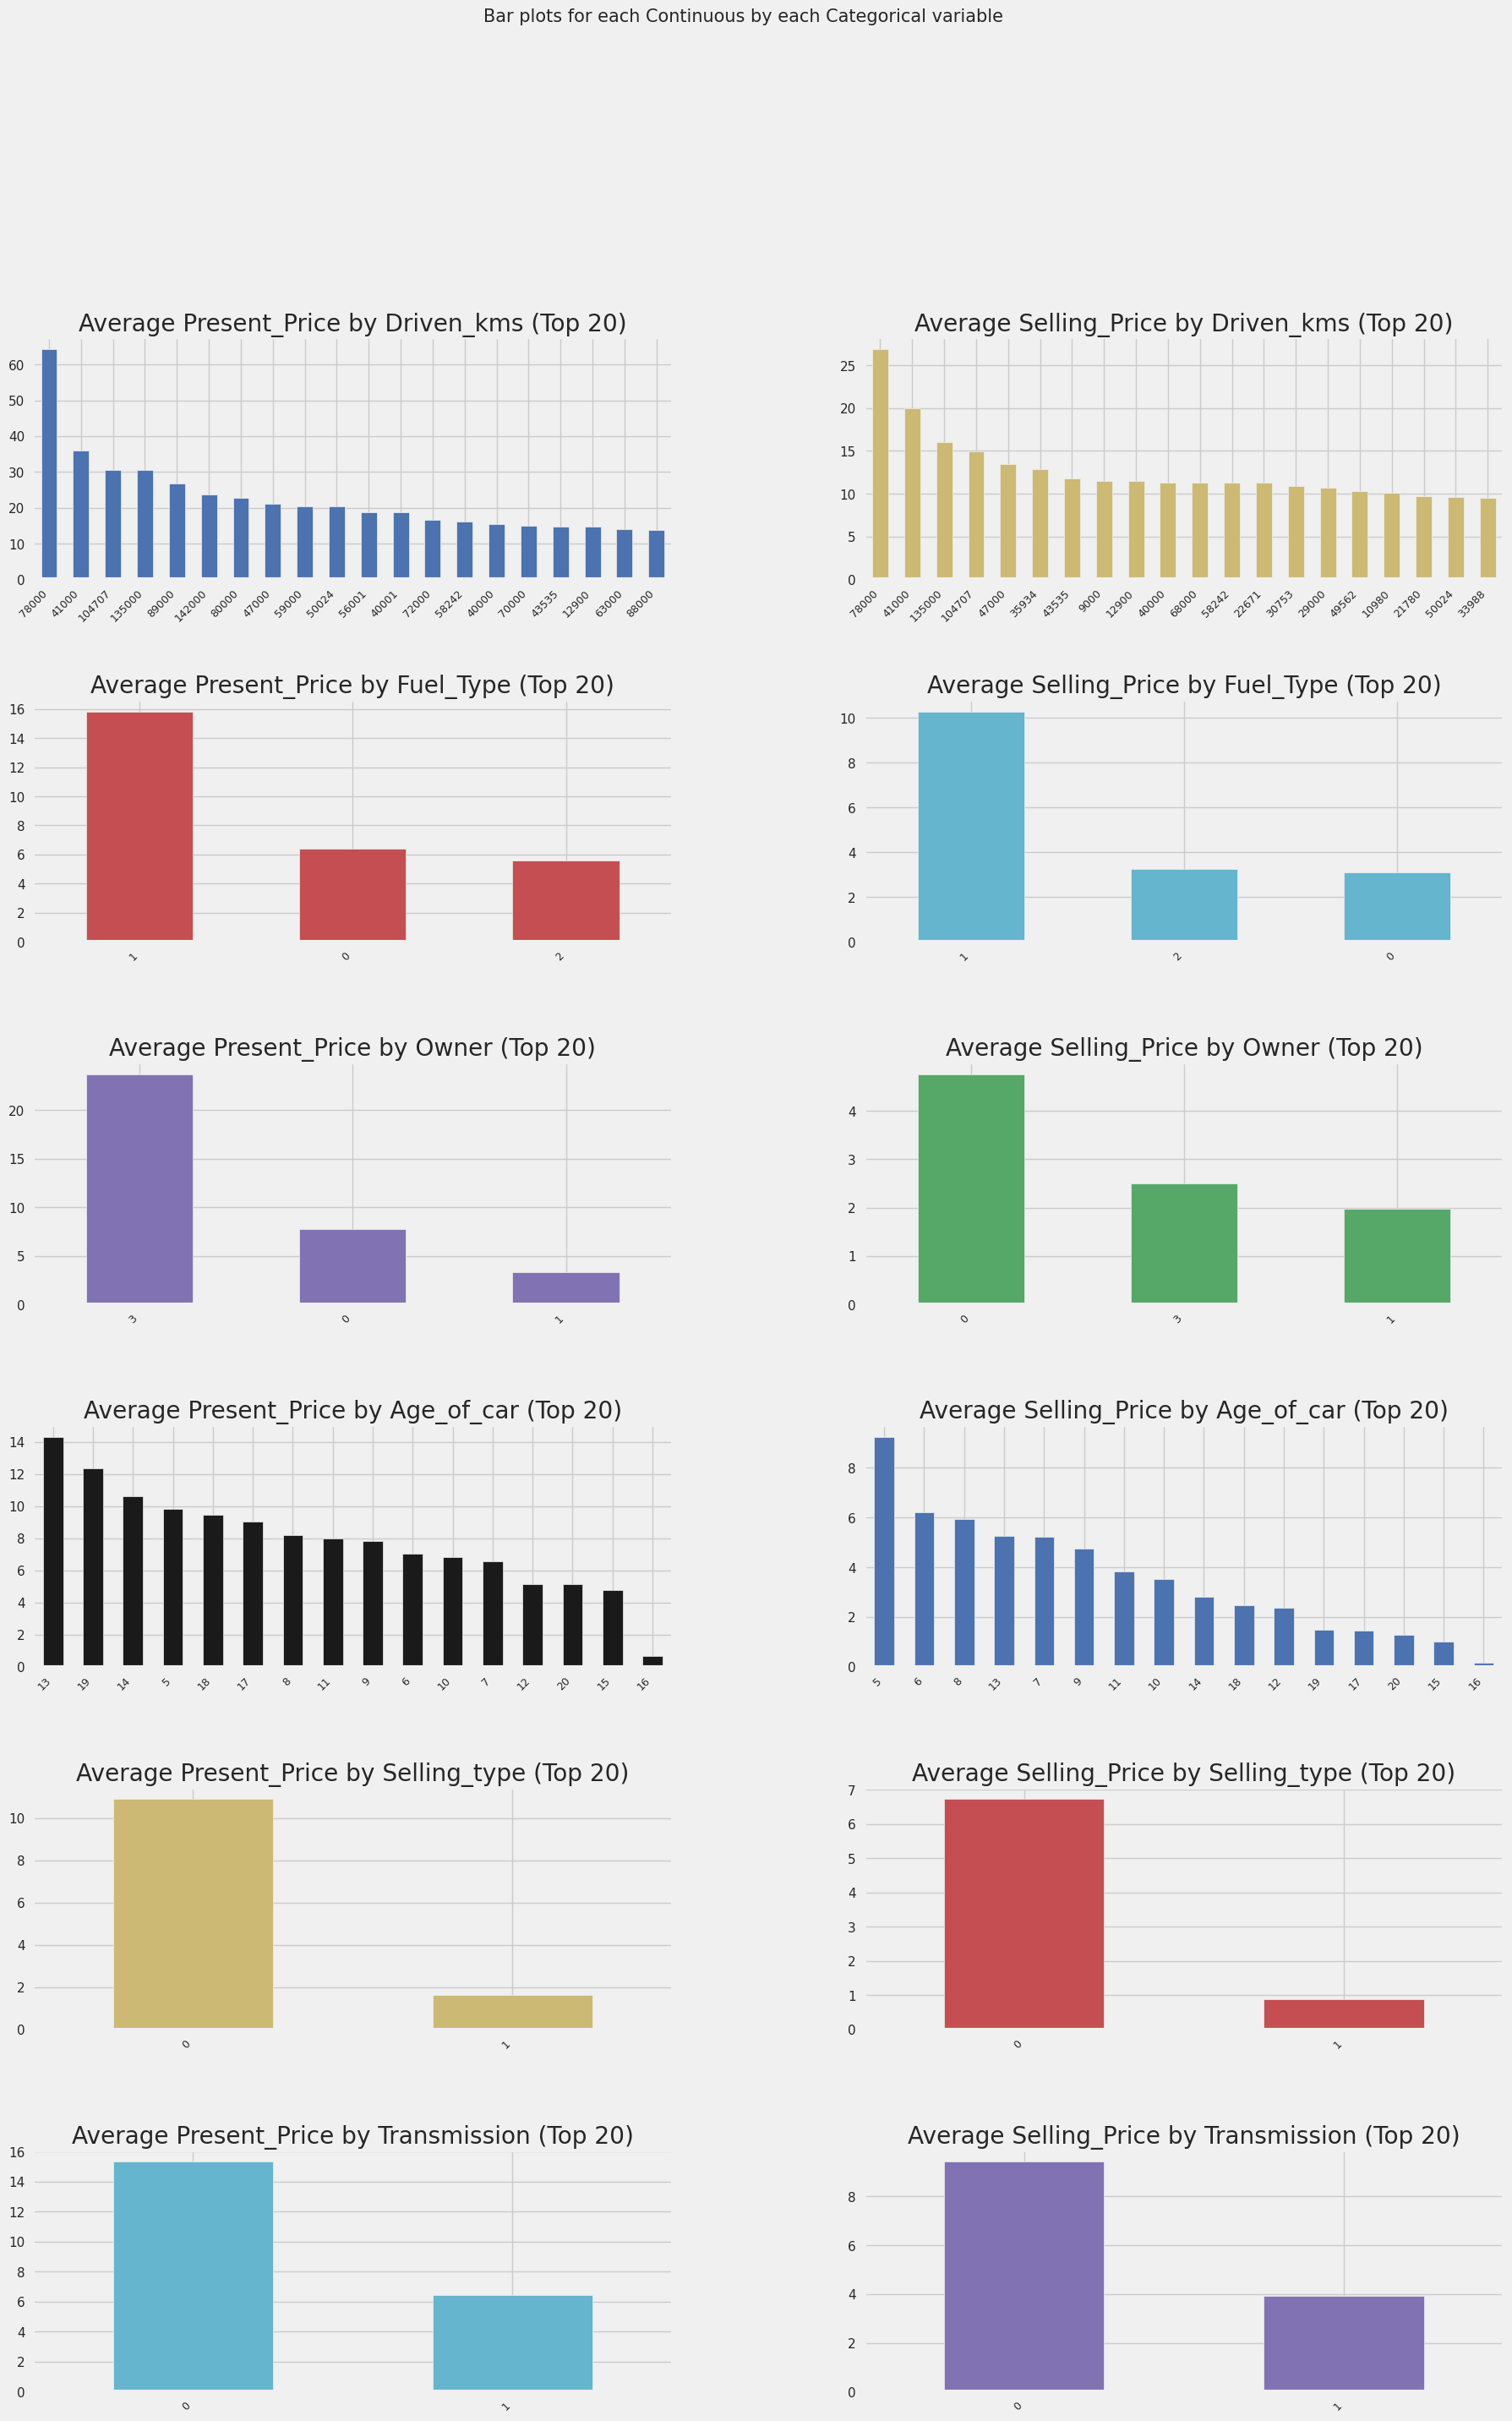

All Plots done
Time to run AutoViz = 19 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz(
    filename='/content/cleaned_car_data.csv',
    sep=',',
    depVar='Selling_Price',
    dfte=df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format='svg',
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)


#Let's understand which feature is impacting the most on the target among all the features

In [ ]:
X= df.drop('Selling_Price',axis=1)

In [ ]:
y= df['Selling_Price']

In [ ]:
X.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age_of_car
0,2014,5.59,27000,2,0,1,0,9
1,2013,9.54,43000,1,0,1,0,10
2,2017,9.85,6900,2,0,1,0,6
3,2011,4.15,5200,2,0,1,0,12
4,2014,6.87,42450,1,0,1,0,9


In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
classifier = ExtraTreesClassifier()

In [ ]:
classifier.fit(X,y.round().astype(int))

ExtraTreesClassifier()

In [ ]:
classifier.feature_importances_

array([0.08877008, 0.3608447 , 0.25724389, 0.03606484, 0.12743156,
       0.03015791, 0.01152991, 0.08795709])

In [ ]:
new_df = pd.DataFrame({"Columns":X.columns,"Feature_imp":classifier.feature_importances_})

In [ ]:
px.bar(new_df,x='Columns',y='Feature_imp')

* By this we can get to know that the Present_price has the more importance among all the features available


* And after that the Driven_kms holds the second importance level

In [ ]:
# split the Train and Test parts
X_train,X_test , y_train,y_test= train_test_split(X,y,test_size=0.25)

# Choose and Train the model

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor


In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

In [ ]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
BaggingRegressor                       0.91           0.92    1.57     0.05   
ExtraTreesRegressor                    0.91           0.92    1.59     0.23   
XGBRegressor                           0.90           0.91    1.65     0.10   
RandomForestRegressor                  0.90           0.91    1.70     0.18   
MLPRegressor                           0.89           0.90    1.74     0.29   
GradientBoostingRegressor              0.89           0.90    1.77     0.19   
PoissonRegressor                       0.88           0.89    1.83     0.02   
AdaBoostRegressor                      0.87           0.89    1.91     0.15   
KNeighborsRegressor                    0.85           0.87    2.06     0.03   
LGBMRegressor                          0.84           0.86    2.12     0.13   
HistGradientBoostingRegressor          0.83         

* From the above autoML regression we can choose the model depending on the metrics and the time taken  by every model to train and test which by selecting the suitable model can be furthur used for the hyper parameter tuning

# I'm choosing Random forest regression as my Model

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9095943767513985

# Our model have made an accuracy of 90%